# Immigration statistics from the Middle East

Based on data published in Orfalea, Gregory. 2006. *The Arab Americans: A History.* Northampton, Mass: Olive Branch Press, pages 436-41.

In [2]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
sns.set_theme()

## Chart 1: Number of Arrivals in the United States from Turkey in Asia, by Sex, 1869-1898

Some totals do not add correctly, possibly due to inconsistent records. Source: *International Migration Statistics*, Vol 1, National Bureau of Economic Research, Inc. 1925. Table II-a "Distribution of Immigrant Aliens by Sex and Country of Origin," 1869-1898, pp. 418-31. (Orfaela 2006)

<AxesSubplot:xlabel='Year'>

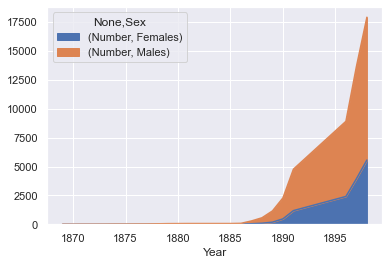

In [3]:
chart1df = pd.read_csv('./1869-1898-narrow.csv')
chart1df.set_index('Year').sort_values('Year')
chart1df.tail()

pt = pd.pivot_table(chart1df, columns=['Sex'], index=['Year'], values=['Number'], fill_value=0)
pt = pt.cumsum()
pt.plot.area()

## Chart 2: Number of Arrivals from Syria in the United States by Sex, 1899-1932

Source: *International Migration Statistics*, Table X, pp. 432-43, for data to 1925. Data from 1925 on are found in *Annual Reports of Commissioner General of Immigration*, 1926-1933, Table(s) VIII, "Immigrant Aliens Admitted Fiscal Year Ending June 30 by Race or People, Sex and Age." (Orfaela 2006)

<AxesSubplot:xlabel='Year'>

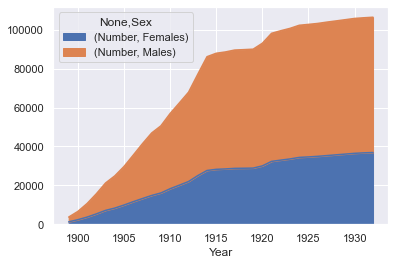

In [4]:
chart2df = pd.read_csv('./1899-1932-narrow.csv')
chart2df.set_index('Year').sort_values('Year')
chart2df.tail()

pt = pd.pivot_table(chart2df, columns=['Sex'], index=['Year'], values=['Number'], fill_value=0)
pt = pt.cumsum()
pt.plot.area()

## Chart 3: Combined, 1968-1932

<AxesSubplot:xlabel='Year'>

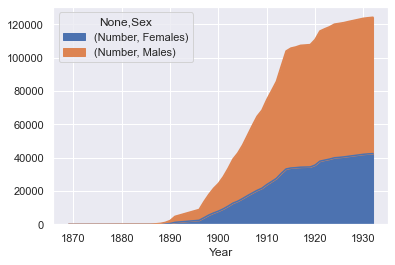

In [5]:
combined = pd.concat([chart1df, chart2df])
pt = pd.pivot_table(combined, columns=['Sex'], index=['Year'], values=['Number'], fill_value=0)
pt = pt.cumsum()
pt.plot.area()

## Chart 4: Arab Immigration to the United States, 1948-1985

Source: U.S. Immigration and Naturalization Service. Data based on the country of birth of Immigrant (Orfala 2006)

*Note: Countries are separated in the data, but combined in the chart to ease clarity and inconsistencies in the coding of individual countries.*

<AxesSubplot:xlabel='Year'>

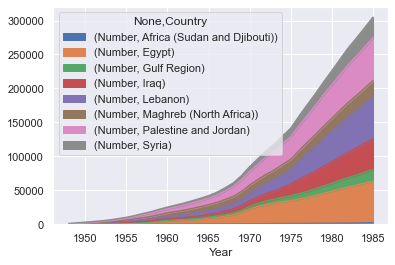

In [7]:
midCentury = pd.read_csv('./1948-1985-narrow.csv')
midCentury.set_index('Year').sort_values('Year')
midCentury.tail()

pt = pd.pivot_table(midCentury, columns=['Country'], index=['Year'], values=['Number'], fill_value=0)
pt = pt.cumsum()
pt.plot.area()